#**Data Visualization**

This project is about creating a visualization plot for dataset-2 by categories, amount, profit and order

First we need to upload all the necessary libraries for the project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

After uploading the CSV file on Google Colab, it file will be checked using read_csv() function from pandas . The head() function will show the first 5 rows of the data

In [ ]:
df = pd.read_csv("dataset-2.csv")
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


We will use info() function to provide a concise summary for the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


We are going to drop all the null values in the dataframe

In [ ]:
df.dropna(axis=1, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


So from the above we can now be confirmed that there are no null values in the dataset. Now, the next step will be to remove the "Sub-Category" column from the dataset and keep the rest of the four columns

In [ ]:
df = df.drop("Sub-Category", axis=1)
df.head()

,Order ID,Amount,Profit,Quantity,Category
0,B-25601,1275.0,-1148.0,7,Furniture
1,B-25601,66.0,-12.0,5,Clothing
2,B-25601,8.0,-2.0,3,Clothing
3,B-25601,80.0,-56.0,4,Electronics
4,B-25602,168.0,-111.0,2,Electronics


Great, Now the table is ready for visualization.

# **Line Plot**

We will first start by creating a line plot. .plot() function is used to plot all the columns along with labels

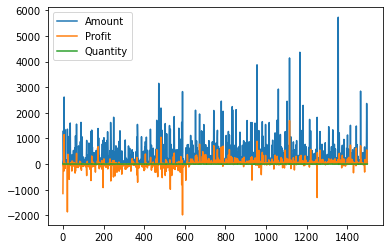

In [ ]:
df.plot()

From the plot above, we can say that there is a positive pattern for amount and negative pattern for profit

We can also create line plots for amount and profit in relation to quantity

**Amount-Quantity Plot**

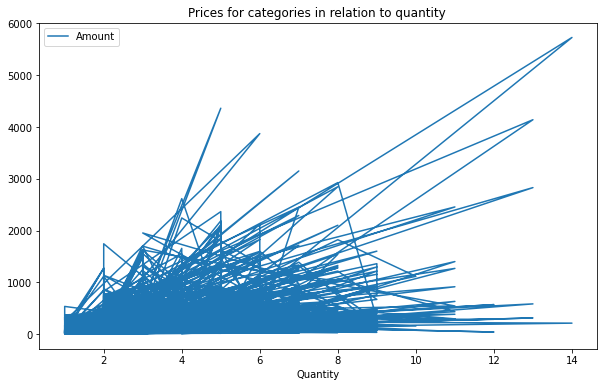

In [11]:
df.plot(x='Quantity', y='Amount',figsize=(10,6), title='Prices for categories in relation to quantity ')

**Profit-Quantity Plot**

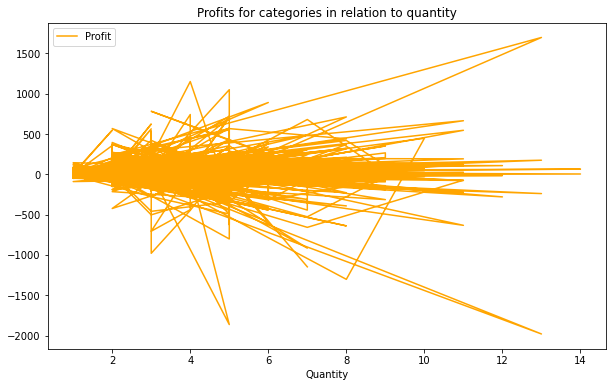

In [13]:
df.plot(x='Quantity', y='Profit',figsize=(10,6), title='Profits for categories in relation to quantity', color='orange')

The plots above look a lot messy, which can be fixed by drawing scatter plot. We'll draw scatter plot later.

But from the plot above we can say that there is an upward trend in amount and a downward trend in profit in relation to quantity

# **Subplots**

We will now generate subplots for each individual columns in the dataset

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f68b7736c50>,
      dtype=object)

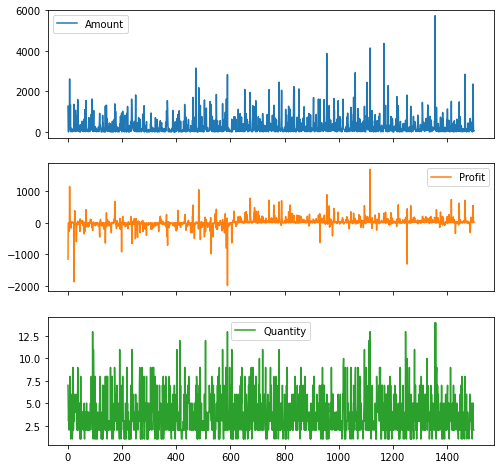

In [8]:
df.plot(subplots=True, figsize=(8, 8))

The subplot above gives a clear indication about the positive trend in Amount and quantity but mostly negative trend in profit

#**Scatter Plot**

A scatter plot is drawn to check the correlation between two variables. We'll draw scatter plots to check the correlation between amount, price and quantity


**Amount-Quantity Scatter Plot**

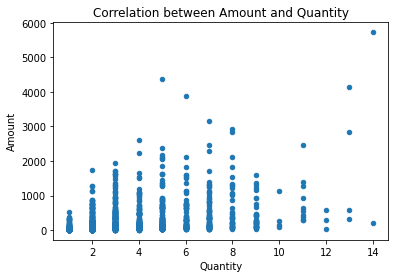

In [15]:
df.plot(x="Quantity", y="Amount", kind="scatter", title="Correlation between Amount and Quantity")

**Profit-Quantity Scatter Plot**

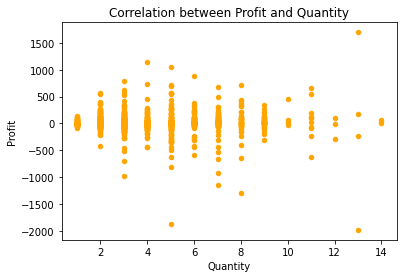

In [16]:
df.plot(x="Quantity", y="Profit", kind="scatter", title="Correlation between Profit and Quantity", color="orange")

We observe that there is a positive correlation between Amount and Quantity but a negative correlation between Profit and Quantity

# **Bar Plot(Histogram)**

Another commonly used plot type in exploratory data analysis is histogram. It divides the value range of a continuous variable into discrete bins and counts the number of observations (i.e. rows) in each bin. Thus, we get a structured overview of the distribution of the variable.

The following codes generates histograms of the Amount and Profit columns.

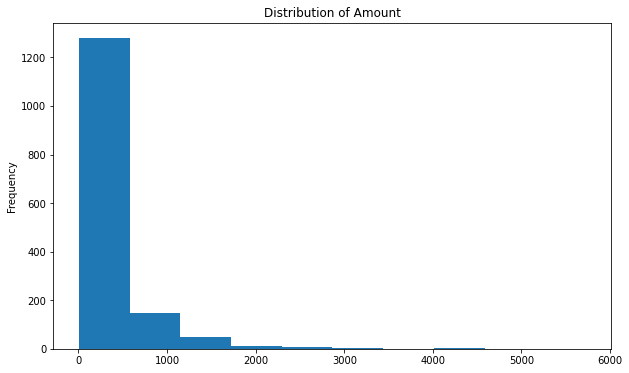

In [18]:
df['Amount'].plot(kind='hist', figsize=(10,6), title='Distribution of Amount')

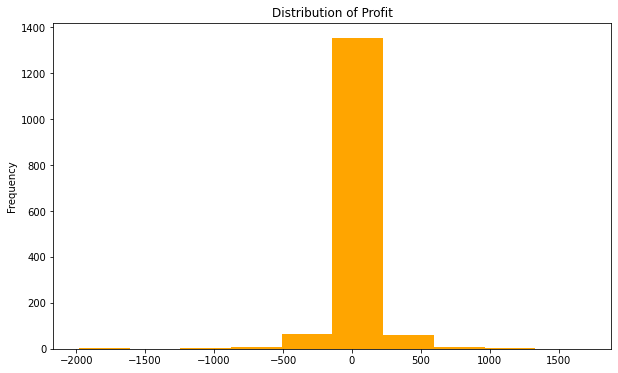

In [19]:
df['Profit'].plot(kind='hist', figsize=(10,6), title='Distribution of Profit', color="orange")

Most of the amount are between 0 to 2000 whereas most of the profits are between -500 and 500

One advantage of using Pandas for creating visualizations is that we can chain data analysis functions and plotting functions. It kind of simplifies the task. For instance, the groupby and plot.bar functions can be used to create a bar plot of the average prices and profits for each categories.

We first group the prices and profits by category name and calculate the average. Then, the plot.bar function is applied to the result.

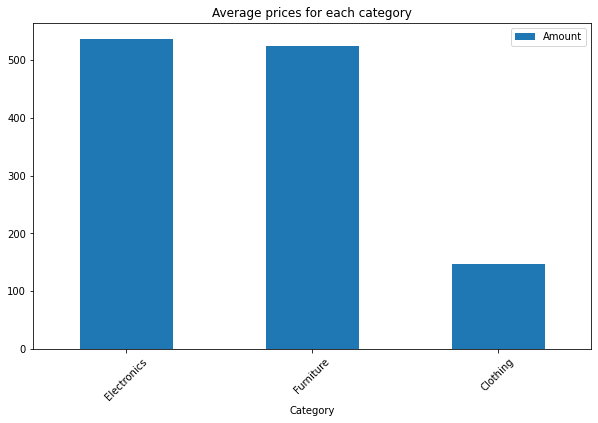

In [20]:
df[['Category','Amount']].groupby('Category').mean().sort_values(by='Amount', ascending=False).plot.bar(figsize=(10,6), rot=45, title='Average prices for each category')

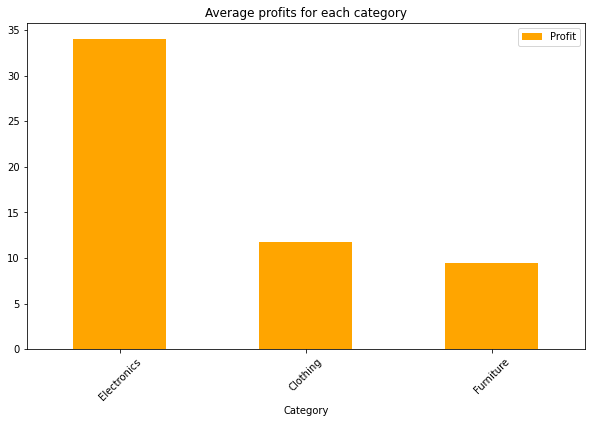

In [22]:
df[['Category','Profit']].groupby('Category').mean().sort_values(by='Profit', ascending=False).plot.bar(figsize=(10,6), rot=45, color="orange", title='Average profits for each category')

So from the above plots wecan conclude that electronics with higher aount made higher profits whereas furnitures with higher amount did not make much profit. For clothing the amount and profit remains same